In [2]:
import torch
import torch.nn as nn
from torchvision import models
import torchvision

# 1. Carica modello pre-addestrato su ImageNet
model = models.resnet18(pretrained=True)  # oppure resnet50

# 2. Blocca i pesi della parte convoluzionale
for param in model.parameters():
    param.requires_grad = False

# 3. Sostituisci il classifier finale con uno adatto al tuo numero di classi
class_names = ['zanetti', 'albini', 'katelos']
num_classes = len(class_names)  # es. 2 per ants/bees
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 4. Sposta modello su device (GPU se disponibile)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# 5. Definisci loss e ottimizzatore
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)


/home/sala/manuscriptrecognition/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sala/manuscriptrecognition/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import os
import numpy as np
from PIL import Image
import random

import matplotlib.pyplot as plt

import torch
import torchvision

# Creating a custom dataset class
class ImageDataset(torch.utils.data.Dataset):
    
    def __init__(self, dir, transform=None):
        self.data_dir = dir
        self.images = os.listdir(dir)
        self.transform = transform

    # Defining the length of the dataset
    def __len__(self):
        return len(self.images)

    # Defining the method to get an item from the dataset
    def __getitem__(self, index):
        image_path = os.path.join(self.data_dir, self.images[index])
        image_np = np.array(Image.open(image_path)) # forza grayscale
        image = torch.from_numpy(image_np).unsqueeze(0) / 255.0

        # Applying the transform
        if self.transform:
            image = self.transform(image)
        
        return image

Number of training examples: 20256


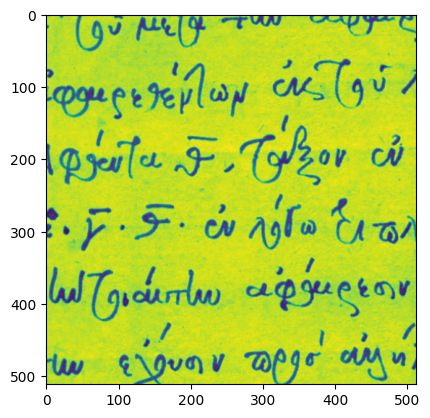

In [4]:
# Replace the path with the path to your dataset
data_path = '../data/patches/gsc/albini'

# Creating a dataset object with the path to the dataset
dataset = ImageDataset(data_path)

# Getting the length of the dataset
dataset_length = len(dataset)

# Printing the length of the dataset
print('Number of training examples:',dataset_length)

# Generating a random index within the dataset length
random_index = random.randint(0, dataset_length - 1)

# Plotting the randomly selected image
plt.imshow(dataset[random_index].squeeze(0))
plt.show()

In [11]:
class SaltAndPepper(object):

    def __init__(self, generator, amount=0.05):
        self.amount = amount
        self.generator = generator

    #definisco la trasformazione

    def __call__(self, image):

        #dimensioni
        if image.ndim == 3:
            _, h, w = image.shape
        else:
            h, w = image.shape


        number_of_pixels = int(h * w * self.amount)

        # Pick a random y coordinate
        y_coord=torch.randint(0, h, (number_of_pixels,), generator=self.generator)
        
        # Pick a random x coordinate
        x_coord=torch.randint(0, w, (number_of_pixels,), generator=self.generator)
        
        # Color that pixel to white
        image[:, y_coord, x_coord] = 1.0
            
        # Randomly pick some pixels in
        # the image for coloring them black
        # Pick a random number between 300 and 10000 
        
        # Pick a random y coordinate
        y_coord=torch.randint(0, h, (number_of_pixels,), generator=self.generator)
        
        # Pick a random x coordinate
        x_coord=torch.randint(0, w, (number_of_pixels,), generator=self.generator)
        
        # Color that pixel to black
        image[:, y_coord, x_coord] = 0.0

        return image
    

Number of training examples: 20256


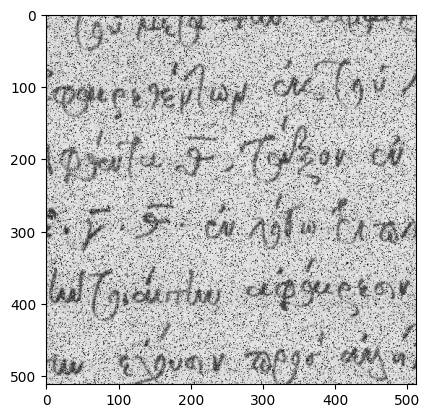

In [13]:
rng = torch.Generator().manual_seed(2025)# crea un generatore

# Replace the path with the path to your dataset
data_path = '../data/patches/gsc/albini'

# Creating a dataset object with the path to the dataset
dataset = ImageDataset(data_path, transform=SaltAndPepper(generator= rng, amount= 0.1))

# Getting the length of the dataset
dataset_length = len(dataset)

# Printing the length of the dataset
print('Number of training examples:',dataset_length)

# Plotting the randomly selected image
plt.imshow(dataset[random_index].squeeze(0),cmap='gray')
plt.show()

In [ ]:
from torchvision.transforms import v2

rng = np.random.default_rng(2025)  # crea un generatore

# Replace the path with the path to your dataset
data_path = '../data/patches/gsc/albini'

# Creating a dataset object with the path to the dataset
dataset = ImageDataset(data_path, transform=transforms.RandomRotation(degrees=90))

# Getting the length of the dataset
dataset_length = len(dataset)

# Printing the length of the dataset
print('Number of training examples:',dataset_length)

# Plotting the randomly selected image
plt.imshow(dataset[random_index],cmap='gray')
plt.show()

Number of training examples: 20256


TypeError: Unexpected type <class 'numpy.ndarray'>